# STA130 HW 3

Rasyid Rafi Pamuji

Student Number: 1011270081

## 1. The dataset can be visualized using the code as shown below:

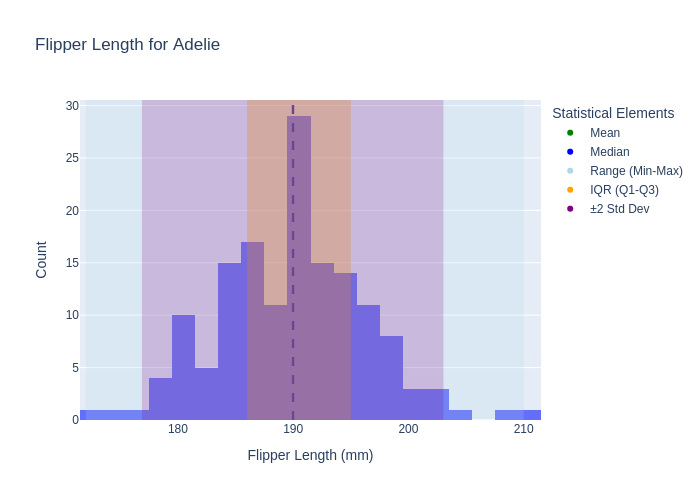

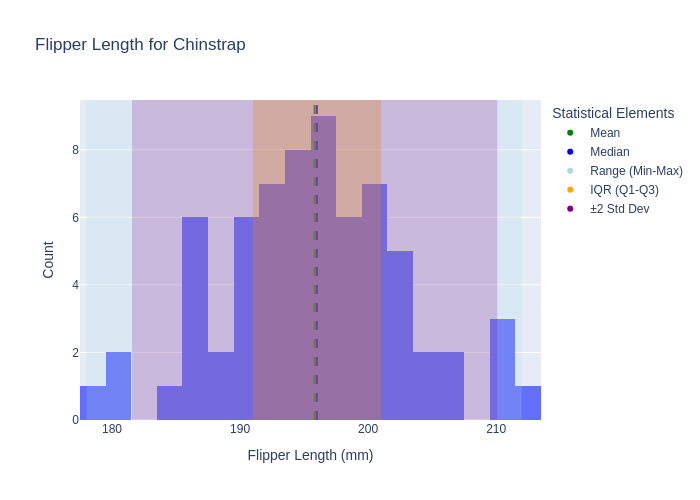

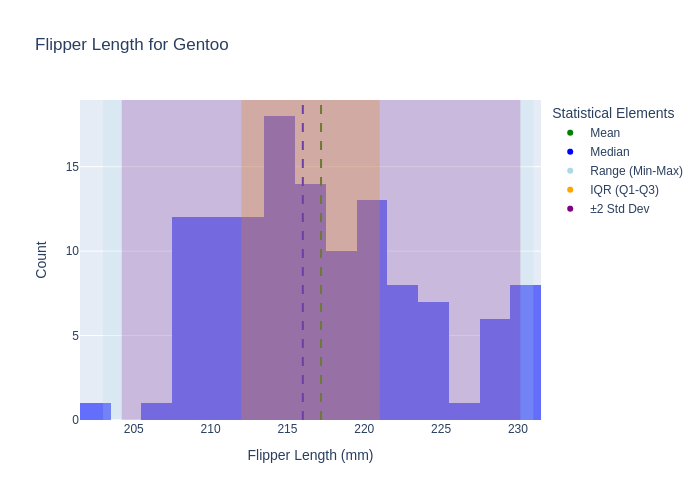

In [8]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

def plot_flipper_length_histogram(df, species):
    # Filter the dataset for the given species
    df_species = df[df['species'] == species]

    # Calculate statistics
    flipper_length = df_species['flipper_length_mm'].dropna()
    mean_fl = flipper_length.mean()
    median_fl = flipper_length.median()
    min_fl, max_fl = flipper_length.min(), flipper_length.max()
    std_fl = flipper_length.std()
    q1 = flipper_length.quantile(0.25)
    q3 = flipper_length.quantile(0.75)

    # Define range bounds
    lower_2std, upper_2std = mean_fl - 2 * std_fl, mean_fl + 2 * std_fl

    # Create histogram
    fig = px.histogram(df_species, x='flipper_length_mm', nbins=20, title=f'Flipper Length for {species}')
    
    # Add mean and median lines with clear legend
    fig.add_vline(x=mean_fl, line=dict(color='green', dash='dash'), name="Mean")
    fig.add_vline(x=median_fl, line=dict(color='blue', dash='dash'), name="Median")

    # Add rectangles for range, IQR, and ±2 std devs, with legend
    fig.add_vrect(x0=min_fl, x1=max_fl, fillcolor="lightblue", opacity=0.2, line_width=0, name="Range (Min-Max)")
    fig.add_vrect(x0=q1, x1=q3, fillcolor="orange", opacity=0.3, line_width=0, name="IQR (Q1-Q3)")
    fig.add_vrect(x0=lower_2std, x1=upper_2std, fillcolor="purple", opacity=0.2, line_width=0, name="±2 Std Dev")

    # Manually add traces for the legend
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(color="green"), name="Mean"))
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(color="blue"), name="Median"))
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(color="lightblue"), name="Range (Min-Max)"))
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(color="orange"), name="IQR (Q1-Q3)"))
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(color="purple"), name="±2 Std Dev"))

    # Update layout for readability
    fig.update_layout(
        legend_title="Statistical Elements",
        xaxis_title="Flipper Length (mm)",
        yaxis_title="Count",
        showlegend=True
    )

    return fig

# Plot for Adelie species
fig_adelie = plot_flipper_length_histogram(df, 'Adelie')
fig_adelie.show(renderer="png")

# Plot for Chinstrap species
fig_chinstrap = plot_flipper_length_histogram(df, 'Chinstrap')
fig_chinstrap.show(renderer="png")

# Plot for Gentoo species
fig_gentoo = plot_flipper_length_histogram(df, 'Gentoo')
fig_gentoo.show(renderer="png")


## 2. The following code is the visualization of the "penguins" dataset using Seaborn KDE Plots:

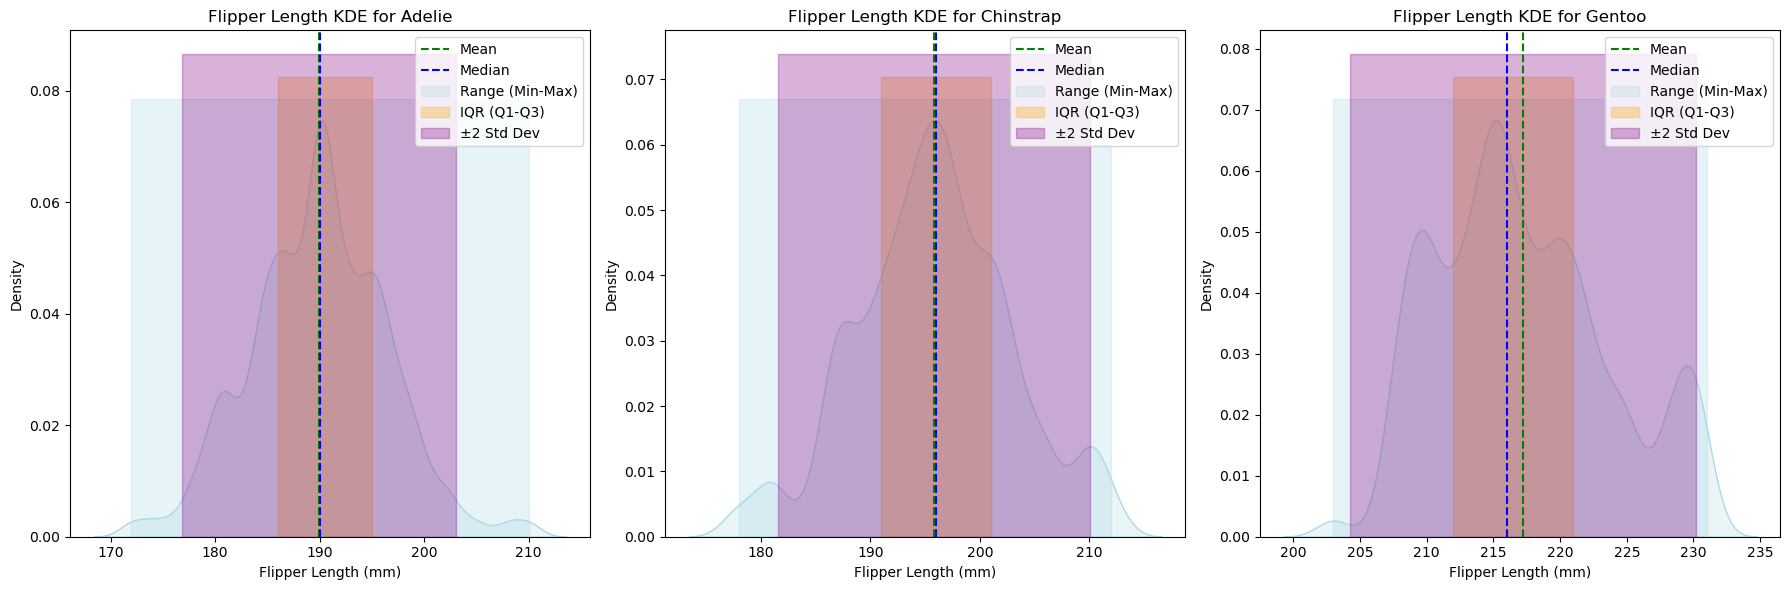

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Create a row of 3 plots

# Define species for iteration
species_list = ['Adelie', 'Chinstrap', 'Gentoo']

for ax, species in zip(axes, species_list):
    # Filter the dataset for the given species
    df_species = df[df['species'] == species]

    # Calculate statistics
    flipper_length = df_species['flipper_length_mm'].dropna()
    mean_fl = flipper_length.mean()
    median_fl = flipper_length.median()
    min_fl, max_fl = flipper_length.min(), flipper_length.max()
    std_fl = flipper_length.std()
    q1 = flipper_length.quantile(0.25)
    q3 = flipper_length.quantile(0.75)
    
    # Define range bounds
    lower_2std, upper_2std = mean_fl - 2 * std_fl, mean_fl + 2 * std_fl

    # Create KDE plot
    sns.kdeplot(flipper_length, ax=ax, fill=True, color='lightblue', bw_adjust=0.5)
    
    # Add mean and median lines
    ax.axvline(mean_fl, color='green', linestyle='--', label='Mean')
    ax.axvline(median_fl, color='blue', linestyle='--', label='Median')

    # Add shaded regions for range, IQR, and ±2 std deviations
    ax.fill_betweenx([0, ax.get_ylim()[1]], min_fl, max_fl, color='lightblue', alpha=0.3, label='Range (Min-Max)')
    ax.fill_betweenx([0, ax.get_ylim()[1]], q1, q3, color='orange', alpha=0.3, label='IQR (Q1-Q3)')
    ax.fill_betweenx([0, ax.get_ylim()[1]], lower_2std, upper_2std, color='purple', alpha=0.3, label='±2 Std Dev')

    # Set titles and labels
    ax.set_title(f'Flipper Length KDE for {species}')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')

    # Add legend
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


## 3. Box Plots, Histograms, and KDEs Comparisons

I told the Chatbot that these are the main differences between Box Plots, Histograms, and KDEs:

**Box Plots**: Accurately shows the range of the dataset. Don't show counts for multimodal traits. State sample size in box plots.

**Histograms**: Shows the peaks of the dataset. Shows peaks for dataset, can be bimodal, multimodal, etc.

**Kernel Density Estimator**: Continuous histogram, smooth.

Chatbot described well the pros and cons of each data visualization methods. 

After chatting with the Chatbot, I have come to the conclusion that I prefer the box plot data visualization method. The reason is that it is very useful in situations where we need a lot of items in a dataset and where sample counts aren't that important. It accurately shows the median, quartiles, and highlights the outliers. However, each one has their own benefits as explained during my Chatbot session. Therefore, even though my personal preference is the box plot, all data visualization methods can be useful in their own ways.

## Chatbot Summary for no. 1-3:

**Certainly! Here's a summary of our conversation:**

Summary of Conversation
1. Penguin Dataset Visualization:

You requested a Python code implementation to create histograms of flipper lengths for each species in the penguins dataset, marking key statistical elements (mean, median, range, interquartile range, and ±2 standard deviations) using Plotly.
An updated version of the code was provided to ensure clarity and readability, utilizing legends for annotations instead of overlapping text.

2. Kernel Density Estimation (KDE) Plots:

Following the histogram discussion, you asked for a similar visualization using KDE plots with the same statistical elements, organized in a row of three plots for each species.
The code for creating KDE plots was shared, detailing the advantages of this method for visualizing distribution shapes.

3. Comparative Analysis of Visualization Types:

- You presented contrasting descriptions of box plots, histograms, and KDEs, highlighting their key features, advantages, and disadvantages.
- We discussed the strengths and weaknesses of each visualization type:
- Box Plots: Effective for summarizing distributions and identifying outliers but lack detailed distribution shapes and sample size representation.
- Histograms: Good for showing frequency distributions and peaks but sensitive to bin sizes and can be misleading.
- KDE: Offers a smooth representation of distributions, avoiding binning issues but is sensitive to bandwidth choice and can obscure local features.

This summary captures the key points of our discussion on data visualization techniques, specifically in relation to the penguin dataset. Let me know if you need any adjustments or further information!

Chatbot Link: https://chatgpt.com/share/66f614bf-01c0-8004-bace-3d62cdad6507

## 4. Code Execution and its Resulting figure of distributions

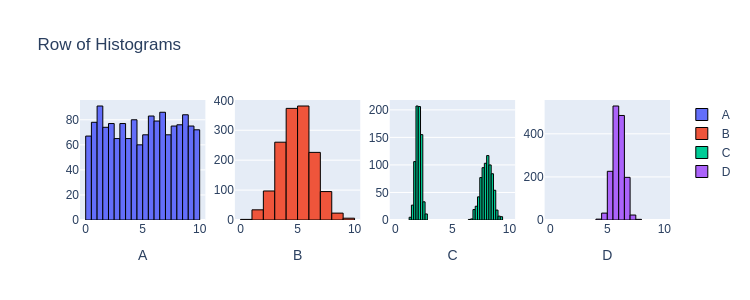

In [12]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

After carefully evaluating the figures of distributions, these are my answers for the 4 questions:

1.
- Data A and Data C have comparable means (around 5) and seem to have similar spreads (Data C's bimodal nature makes it slightly tricky, but visually their variances don't seem too far apart).

2.
- Data A and Data B appear to have similar means (around 5), but Data A (uniform) has a much higher variance, as shown by the flat distribution. Data B has a bell curve with a smaller spread (lower variance).

- Data A and Data C could also be considered here due to the variability of Data C being slightly wider but still bimodal.

3. 
- Data B and Data D might have similar variances based on their shapes (both are tightly centered), but Data B centers around 5, while Data D centers around 6.

4. 
- Data A (mean around 5 with a high variance) and Data D (mean around 6 with a much lower variance) differ significantly in both means and variances.

- Data C and Data D also have different means and variances.

## 5. The general relationship between the mean and median and "right" and "left" skewness:

Chatbot Session:

In general, the relationship between the **mean** and **median** provides insight into the skewness of a distribution:

### 1. **Right-Skewed Distribution** (Positive Skewness):
   - **Mean > Median**.
   - In a right-skewed distribution, the tail on the right (higher values) is longer or more stretched out. This means there are some unusually large values that pull the mean to the right, making it greater than the median.
   - **Why?** The mean is sensitive to extreme values (outliers) because it sums all values and divides by the count. In a right-skewed distribution, the large values on the right pull the mean upward, while the median, being the middle value, is less affected by these extremes.

### 2. **Left-Skewed Distribution** (Negative Skewness):
   - **Mean < Median**.
   - In a left-skewed distribution, the tail on the left (lower values) is longer. This means there are some unusually small values that pull the mean to the left, making it smaller than the median.
   - **Why?** Similar to right-skewness, extreme values on the lower end drag the mean down, but the median remains more stable as it focuses only on the middle value.

### Symmetric Distribution:
   - **Mean ≈ Median**.
   - In a perfectly symmetrical distribution (like a normal distribution), the mean and median are equal because the data is evenly distributed on both sides of the center.

### Summary:
   - **Right-Skewed**: Mean > Median.
   - **Left-Skewed**: Mean < Median.
   - This difference arises because the mean is more sensitive to extreme values than the median, which only reflects the central tendency.

Importing the code, we get this output for its dataset:

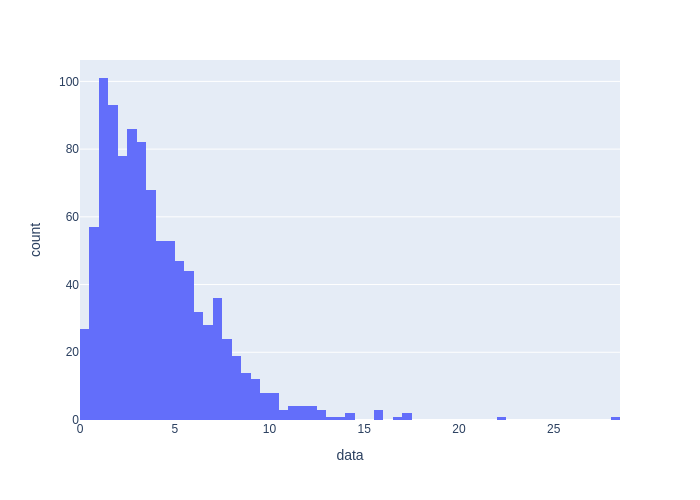

In [14]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

fig1.show(renderer="png")

In my own words, I can safely describe the general relationship between the mean and median and "right" and "left" skewness and what causes this as:

Right-skewed: mean > median

Left-skewed: mean < median

Symmetric Distribution: mean ≈ median

Breaking down the code:

1. Importing Libraries

In [18]:
from scipy import stats
import pandas as pd
import numpy as np

scipy.stats: Provides statistical functions and distributions.

pandas: Useful for data manipulation and creating data structures like DataFrames.

numpy: Provides numerical operations like computing mean and quantiles.

2. Generating a Sample from the Gamma Distribution

In [19]:
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

stats.gamma(a=2, scale=2): Creates a gamma distribution with shape parameter a=2 and scale parameter 2. In this case, it's used to generate a random sample of values that follow this distribution.

.rvs(size=1000): Generates 1000 random values (random variates) from the gamma distribution defined above. These values are stored in sample1.

3. Creating a Histogram

In [20]:
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")

px.histogram: This is likely a function from Plotly Express, a library for creating visualizations. It creates a histogram of the data.

pd.DataFrame({'data': sample1}): Wraps the sample1 array into a Pandas DataFrame with a column named 'data' to pass it to the Plotly function.

x="data": Specifies that the data on the x-axis comes from the 'data' column.

The resulting histogram will show the distribution of the sample1 data generated from the gamma distribution.

fig1.show(renderer="png"): When run, this will display the histogram using the "png" renderer. The comment suggests that this command is necessary for GitHub or MarkUs (likely educational platforms where the code is submitted and graded).

4. Calculating the Mean

In [21]:
sample1.mean()

4.024185109074133

sample1.mean(): Calculates the mean (average) of the 1000 values in sample1. This provides a measure of central tendency for the gamma-distributed data.

5. Calculating the Median

In [22]:
np.quantile(sample1, [0.5])

array([3.38046392])

np.quantile(sample1, [0.5]): This calculates the 50th percentile (or median) of the data in sample1. The quantile function provides values at specified percentiles, and [0.5] is for the median.

6. Generating a Negatively Skewed Sample

In [23]:
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

-stats.gamma(a=2, scale=2).rvs(size=1000): This line generates 1000 values from the same gamma distribution, but by negating the result (i.e., multiplying by -1), it creates a negatively skewed distribution (left-skewed). The sample2 will be the negative of gamma-distributed values, hence reversing the skew.

## Summary of the Code:

1. Generates 1000 random values (sample1) from a gamma distribution with a=2 and scale=2 (right-skewed).

2. Creates a histogram to visualize this distribution.

3. Computes the mean and median of sample1 to compare central tendencies.

4. Generates another set of 1000 random values (sample2), which is the negative of a gamma distribution, resulting in a left-skewed distribution.

This is useful for understanding and visualizing the properties of right-skewed (positive) and left-skewed (negative) distributions and how their mean and median compare.

Here's a summary of the chat:

1. **Skewness and Mean vs. Median**: We discussed how the relationship between the mean and median is affected by skewness in a distribution:
   - **Right-skewed (positive skewness)**: The mean is greater than the median.
   - **Left-skewed (negative skewness)**: The mean is less than the median.
   - This occurs because the mean is more sensitive to extreme values than the median.

2. **Python Code Explanation**:
   - **Purpose**: The provided code generates random samples from a gamma distribution, visualizes them as a histogram, and calculates the mean and median for analysis.
   - **Steps in the Code**:
     - `sample1` is generated from a gamma distribution (right-skewed).
     - A histogram is created to visualize the distribution.
     - The mean and median are calculated for `sample1`.
     - `sample2` is generated by negating the gamma distribution, resulting in a left-skewed distribution.

The code is designed to explore the statistical properties of skewness in distributions.

Chatbot link: https://chatgpt.com/share/66f5a6c7-6abc-8004-90aa-7cce71058857

## 6. An Interesting Dataset:

An interesting dataset I picked is the superheroes dataset:

https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv

Using ChatGPT to help create code for visualization, I can find out summary statistics and visualizations to understand and demonstate some interesting aspects of the data.

This is the code it outputted:

The code can be interpretted in 3 steps: loading the data, summarizing statistics, and visualizations.

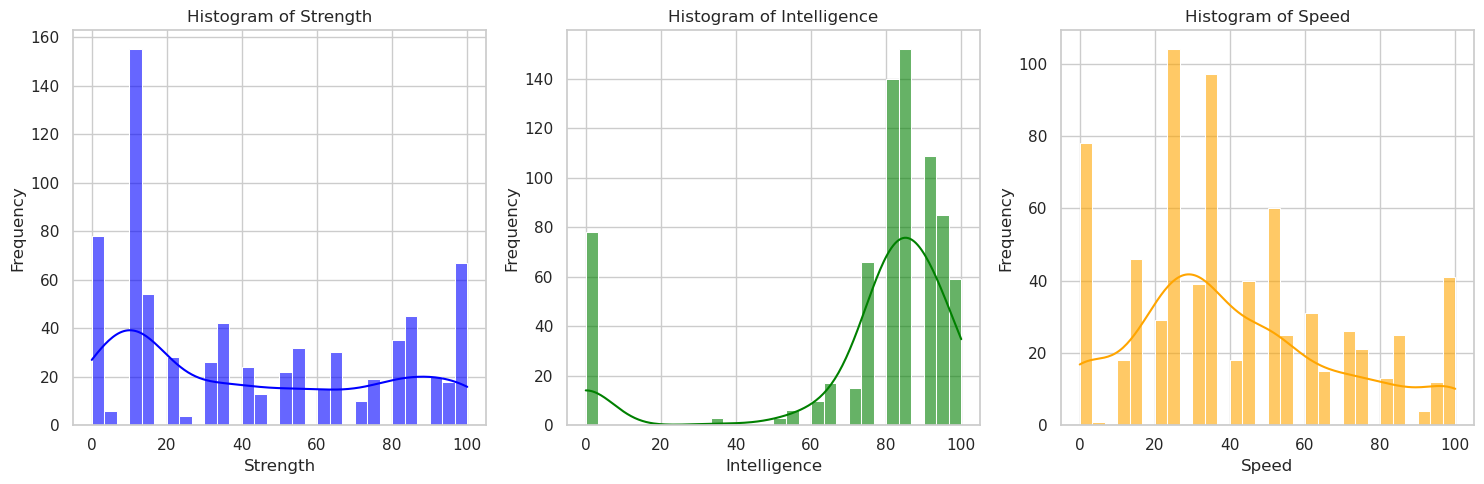

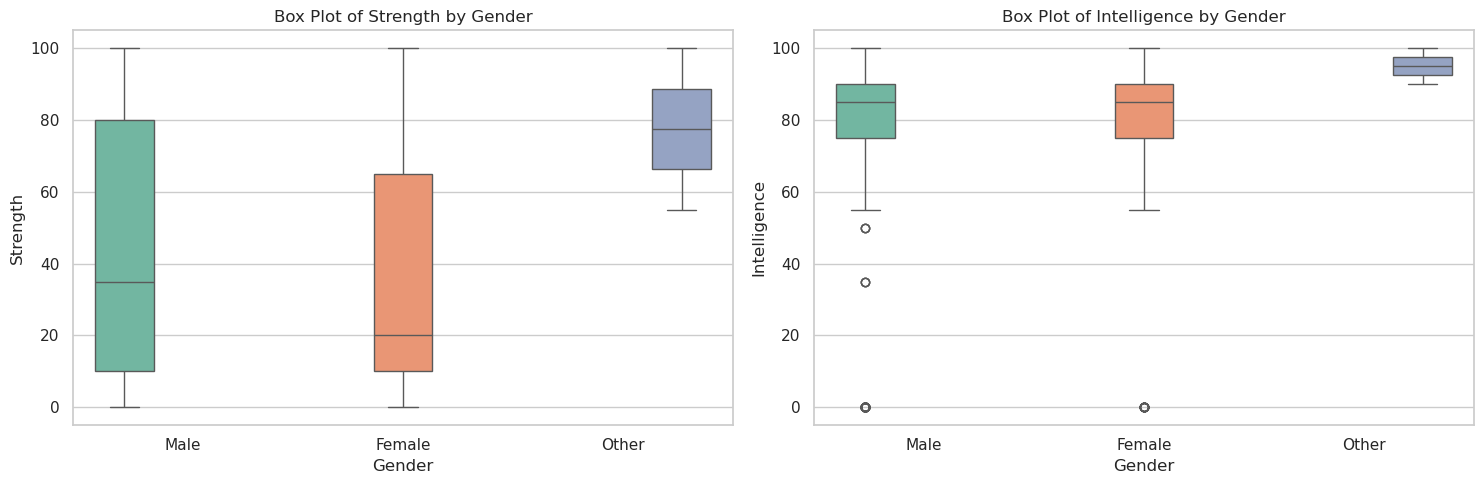

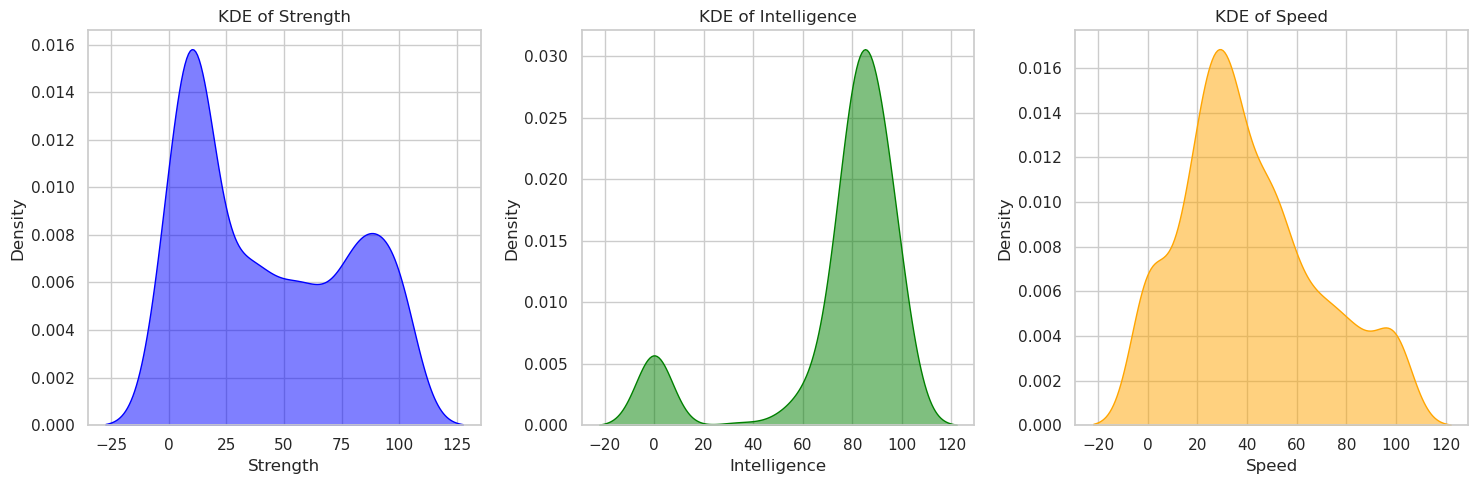

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv"
superheroes = pd.read_csv(url)

# Set the style for the plots
sns.set(style="whitegrid")

# Step 1: Histograms
plt.figure(figsize=(15, 5))

# Histogram for Strength
plt.subplot(1, 3, 1)
sns.histplot(superheroes['Strength'], bins=30, kde=True, color='blue', alpha=0.6)
plt.title('Histogram of Strength')
plt.xlabel('Strength')
plt.ylabel('Frequency')

# Histogram for Intelligence
plt.subplot(1, 3, 2)
sns.histplot(superheroes['Intelligence'], bins=30, kde=True, color='green', alpha=0.6)
plt.title('Histogram of Intelligence')
plt.xlabel('Intelligence')
plt.ylabel('Frequency')

# Histogram for Speed
plt.subplot(1, 3, 3)
sns.histplot(superheroes['Speed'], bins=30, kde=True, color='orange', alpha=0.6)
plt.title('Histogram of Speed')
plt.xlabel('Speed')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 2: Box Plots
plt.figure(figsize=(15, 5))

# Box plot for Strength by Gender
plt.subplot(1, 2, 1)
sns.boxplot(data=superheroes, x='Gender', y='Strength', hue='Gender', palette='Set2', dodge=True)
plt.title('Box Plot of Strength by Gender')
plt.ylabel('Strength')

# Box plot for Intelligence by Gender
plt.subplot(1, 2, 2)
sns.boxplot(data=superheroes, x='Gender', y='Intelligence', hue='Gender', palette='Set2', dodge=True)
plt.title('Box Plot of Intelligence by Gender')
plt.ylabel('Intelligence')

plt.tight_layout()
plt.show()

# Step 3: KDE Plots
plt.figure(figsize=(15, 5))

# KDE for Strength
plt.subplot(1, 3, 1)
sns.kdeplot(superheroes['Strength'], color='blue', fill=True, alpha=0.5)
plt.title('KDE of Strength')
plt.xlabel('Strength')
plt.ylabel('Density')

# KDE for Intelligence
plt.subplot(1, 3, 2)
sns.kdeplot(superheroes['Intelligence'], color='green', fill=True, alpha=0.5)
plt.title('KDE of Intelligence')
plt.xlabel('Intelligence')
plt.ylabel('Density')

# KDE for Speed
plt.subplot(1, 3, 3)
sns.kdeplot(superheroes['Speed'], color='orange', fill=True, alpha=0.5)
plt.title('KDE of Speed')
plt.xlabel('Speed')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


As shown in the visualizations, I can see some interesting aspects in the data. I have showed visualizations for histograms, box plots, and KDEs.

We can see in the histograms and box plots that the strength of the superheroes' distribution is mostly on the left at around 20, with 100 having the 2nd highest frequency. Intelligence is mostly around 80-100, which means it is right-skewed, but some superheroes have 0 as it's value. For speed, there's only 1 peak unlike the other attributes and it's around 20-40.

In the box plots, we can see that males have higher values (range and maximum) of strength compared to females. The other gender(s) has(/have) a higher maximum value compared to males and females however. For intelligence, males and females have similar values (range, mean, median, etc.) while other genders have a higher maximum value but less range.

Chatbot Summary:

Certainly! Here’s a summary of our chat:

1. **Data Visualization**:
   - You were working with superhero data and attempted to create various visualizations, including bar plots and scatter plots. You encountered warnings and errors related to the `hue` parameter and issues with variable interpretation.
   - After discussing the issues, we transitioned to visualizing the data using histograms, box plots, and KDE plots.

2. **Visualizations Discussed**:
   - **Histograms**: For attributes like strength, intelligence, and speed, you could analyze their distributions, central tendencies, and outliers.
   - **Box Plots**: These were used to compare strength and intelligence across genders, providing insights into central tendencies, variability, and outliers.
   - **KDE Plots**: Kernel density estimates were used to visualize the smooth distribution of strength, intelligence, and speed, allowing for the identification of common values and trends.

3. **Descriptive Insights**:
   - We discussed what could be interpreted from the visualizations, such as distribution shapes, central tendencies, comparisons between genders, and the potential for identifying trends and patterns in the data.

4. **Overall Conclusion**:
   - The visualizations can help you understand the relationships between different superhero attributes and how they may differ across genders, providing a basis for further analysis or hypothesis generation.

If you need further assistance or have additional questions, feel free to ask!

Chatbot link: https://chatgpt.com/share/66f62988-52a4-8004-9504-6284735f0cfc

## 7. Gapminder Video and Recreation

Using the plotly version, I can execute the code:

In [36]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

## 8. Edit of previous code:

Second version of the previous code changing some parts:

Edit the fig = px.scatter() function from the Gapminder code so that x is "percent change", y is "rank", size is "percent", and color="sex", animation_frame is "year", and animation_group and hover_name are "name". Then use size_max=50, range_x=[-0.005,0.005]) and remove the log_x=True and range_y parameters

In [39]:
import plotly.express as px

# Example: Replace this with your own DataFrame that contains the necessary columns
# df = your_custom_dataframe()  # Ensure this DataFrame has 'percent change', 'rank', 'percent', 'sex', and 'name'

# Using gapminder dataset for demonstration, but replace with your dataset
df = px.data.gapminder()

# Create the scatter plot (this won't work with gapminder as it lacks the required columns)
fig = px.scatter(df, 
                 x="percent change",  # Ensure this column exists in your DataFrame
                 y="rank",            # Ensure this column exists in your DataFrame
                 animation_frame="year", 
                 animation_group="name",  # Ensure this column exists in your DataFrame
                 size="percent",      # Ensure this column exists in your DataFrame
                 color="sex",         # Ensure this column exists in your DataFrame
                 hover_name="name", 
                 size_max=50, 
                 range_x=[-0.005, 0.005])

fig.show()


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap', 'iso_alpha', 'iso_num'] but received: percent change

## 9. Yes.

End of HW3.